# 描述性统计分析
## 客户社会属性分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
import plotly.figure_factory as ff
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
matplotlib.rcParams['axes.unicode_minus']=False

In [168]:
customer_info= pd.read_csv("./data/data_clean.csv",low_memory=False)
customer_info.head(5)


,A,B,C,D,E,F,G,H,I,J,...,GPPJCW,GSLCPCWDBZ,QYLCPCWDBZ,PTZHPHWSWT,PTZHPHSJWT,XCKH,XYZHPHSJWT,XYZHPHWSWT,GSLCPBYL,QYLCPPJBYL
0,1,A6,20030402,正常,证件齐全,19550511.000,64.07,高中,离退休,60000.000,...,0.978,0.000,0.000,0,1,0,0,0,0.000,0.000
1,2,B145,20060404,正常,证件齐全,19770412.000,42.08,NaN,党政 ( 在职，离退休 ) 机关干部,0.000,...,0.999,0.000,0.000,0,1,0,0,0,0.000,0.000
2,3,B145,19950706,正常,NaN,19631012.000,56.02,大专,社会服务,0.000,...,0.704,0.203,0.003,1,0,0,0,0,60000.000,1222.800
3,4,B26,19940124,正常,NaN,19550207.000,64.10,高中,其他,0.000,...,0.938,0.000,0.000,0,1,0,0,0,0.000,0.000
4,5,B161,19940125,正常,证件齐全,19640914.000,55.03,大专,制造业,0.000,...,0.625,0.000,0.003,0,0,0,0,0,0.000,774.806


### 开户日期

In [171]:
customer_info["C"]= customer_info["C"].astype("str")
customer_info["C"] = customer_info["C"].apply(lambda x: datetime.strptime(x, '%Y%m%d'))

In [172]:
now =datetime(2020,1,1)
customer_info["KHSC"]=(now - customer_info["C"])
customer_info["KHSC"]=customer_info["KHSC"].apply(lambda x: x.days)
customer_info

,A,B,C,D,E,F,G,H,I,J,...,GSLCPCWDBZ,QYLCPCWDBZ,PTZHPHWSWT,PTZHPHSJWT,XCKH,XYZHPHSJWT,XYZHPHWSWT,GSLCPBYL,QYLCPPJBYL,KHSC
0,1,A6,2003-04-02,正常,证件齐全,19550511.000,64.07,高中,离退休,60000.000,...,0.000,0.000,0,1,0,0,0,0.000,0.000,6118
1,2,B145,2006-04-04,正常,证件齐全,19770412.000,42.08,NaN,党政 ( 在职，离退休 ) 机关干部,0.000,...,0.000,0.000,0,1,0,0,0,0.000,0.000,5020
2,3,B145,1995-07-06,正常,NaN,19631012.000,56.02,大专,社会服务,0.000,...,0.203,0.003,1,0,0,0,0,60000.000,1222.800,8945
3,4,B26,1994-01-24,正常,NaN,19550207.000,64.10,高中,其他,0.000,...,0.000,0.000,0,1,0,0,0,0.000,0.000,9473
4,5,B161,1994-01-25,正常,证件齐全,19640914.000,55.03,大专,制造业,0.000,...,0.000,0.003,0,0,0,0,0,0.000,774.806,9472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,9069,B01,2018-12-27,正常,证件齐全,19820124.000,37.11,本科,个体,0.000,...,0.000,0.000,0,0,0,0,0,0.000,0.000,370
9069,9070,B01,2018-12-27,正常,证件齐全,20000426.000,19.08,高中,个体,0.000,...,0.000,0.000,0,0,0,0,0,0.000,0.000,370
9070,9071,B01,2018-12-27,正常,证件齐全,19791224.000,40.00,本科,行政企事业单位工人,0.000,...,0.000,0.000,0,0,0,0,0,0.000,0.000,370
9071,9072,B01,2018-12-27,正常,证件齐全,19990108.000,20.11,本科,个体,0.000,...,0.000,0.000,0,0,0,0,0,0.000,0.000,370


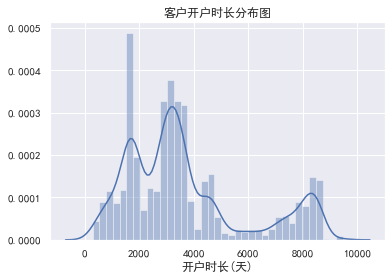

<Figure size 2160x2160 with 0 Axes>

In [173]:
sns.distplot(customer_info['KHSC'])
sns.set(font='SimHei')
plt.title("客户开户时长分布图")
plt.xlabel("开户时长(天)")
plt.figure(figsize=(30,30))

plt.show()


可以看到峰值在1600天，3000天，8300天附近。可以找找原因,可能因为公司有相应的促进开户的政策。
也可以分析一下2300天前，4000 - 6000 天前 为什么开户人员稀少的原因



### 客户规范信

In [6]:
print("客户规范信一列中证件齐全占比：",round(len(customer_info[customer_info["E"]=="证件齐全"])/len(customer_info)*100,2),"%" )

客户规范信一列中证件齐全占比： 84.28 %


In [7]:
dict = {'证件齐全占比':{'占比':round(len(customer_info[customer_info["E"]=="证件齐全"])/len(customer_info),2)},
       '证件不齐全占比':{"占比":1-round(len(customer_info[customer_info["E"]=="证件齐全"])/len(customer_info),2)}
       }
khgfx = pd.DataFrame(dict)
khgfx

,证件齐全占比,证件不齐全占比
占比,0.84,0.16


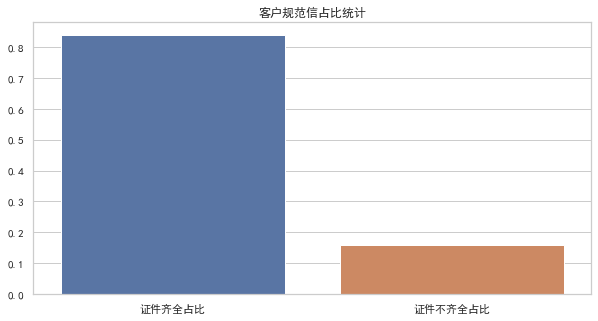

In [8]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户规范信占比统计")
sns.barplot(data=khgfx)


### 客户年龄

In [9]:
customer_info['G']=pd.to_numeric(customer_info['G'],errors='coerce')
def age_seg(x):
    if x<30:
        return str("18-30岁")
    elif x<40:
        return str("30-40岁")
    elif x<50:
        return str("40-50岁")
    elif x<70:
        return str("50-70岁")
    else:
        return str("70岁及以上")

customer_info["NLFC"]=customer_info["G"].apply(lambda x: age_seg(x))
customer_info["NLFC"].value_counts()

50-70岁    3178
30-40岁    2254
40-50岁    1945
70岁及以上    1101
18-30岁     595
Name: NLFC, dtype: int64

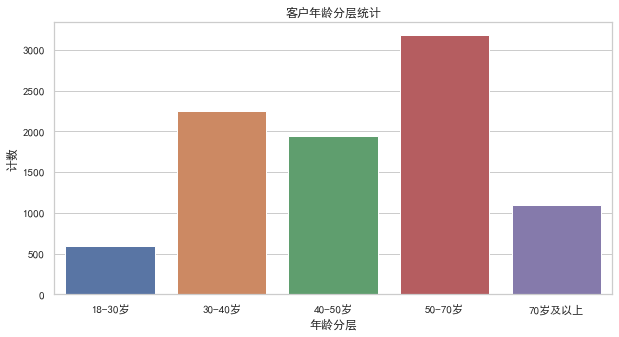

In [10]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户年龄分层统计")
order_nlfc=['18-30岁','30-40岁','40-50岁','50-70岁','70岁及以上']
sns.countplot(customer_info["NLFC"],order=order_nlfc)
plt.ylabel("计数")
plt.xlabel("年龄分层")
plt.show()

### 客户学历代码

In [11]:
xl=customer_info
xl=customer_info["H"].dropna()
xl.value_counts()

本科        2645
大专        2501
高中        1871
硕士         563
初中及其以下     519
中专         379
博士         118
其他          78
Name: H, dtype: int64

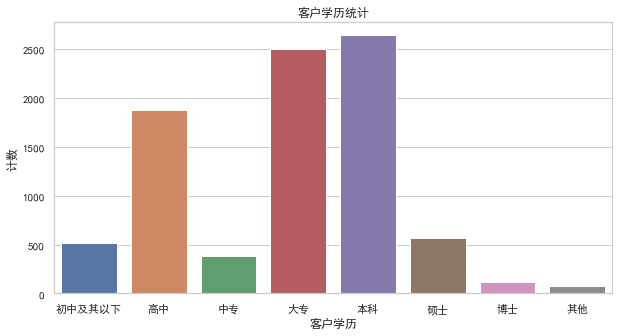

In [12]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户学历统计")
order1=["初中及其以下",'高中',"中专",'大专','本科','硕士','博士',"其他"]
sns.countplot(xl,order=order1)
plt.ylabel("计数")
plt.xlabel("客户学历")
plt.show()

### 职业代码

In [13]:
zydm=customer_info["I"].value_counts().rename_axis('I').reset_index(name='计数')
length=len(customer_info)
zydm=zydm.rename(columns={'I': '职业'})
zydm["占比(%)"]=zydm["计数"].apply(lambda x: round(x/length*100,2))
zydm

,职业,计数,占比(%)
0,其他,1619,17.84
1,自由职业,1352,14.90
2,离退休,859,9.47
3,金融,590,6.50
4,医疗,545,6.01
5,商贸,528,5.82
6,制造业,526,5.80
7,社会服务,414,4.56
8,党政 ( 在职，离退休 ) 机关干部,331,3.65
9,计算机网络,285,3.14


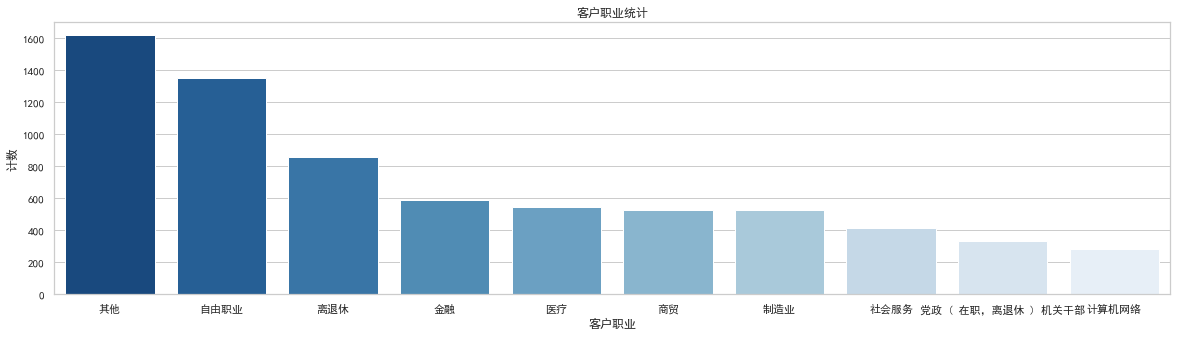

In [14]:

plt.figure(figsize=(20,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户职业统计")
khzy=customer_info["I"].value_counts().head(10)
sns.countplot(customer_info["I"],order=customer_info["I"].value_counts().iloc[:10].index,palette="Blues_r")
plt.ylabel("计数")
plt.xlabel("客户职业")
plt.show()


### 年收入
因为有大量的年收入为0的异常值，仅有10.81%的正确记录率，981条
- 大多数客户,超过四分之三的群体都在年收入 10-50万的区间
- 可以通过对年收入在四分之三的群体进行分析
- 超过500万存款的用户可以了解他们的行为特征

In [15]:
nsr=customer_info[customer_info["J"]!=0]
print("年收入正常记录率： ",round(len(nsr)/len(customer_info)*100,2),"%" )
nsr["年收入"]=nsr["J"].astype(int)


年收入正常记录率：  10.81 %


In [16]:
def ai_seg(x):
    if x<500000:
        return str("0-50万")
    elif x<1000000:
        return str("50-100万")
    elif x<3000000:
        return str("100-300万")
    elif x<10000000:
        return str("300-1000万")
    else:
        return str("1000以上")

nsr["年收入分层"]=nsr["年收入"].apply(lambda x: ai_seg(x))
nsr["年收入分层"].value_counts()



0-50万        836
50-100万       86
100-300万      45
1000以上        10
300-1000万      4
Name: 年收入分层, dtype: int64

In [17]:
nsrzb=nsr["年收入分层"].value_counts().rename_axis('年收入分层').reset_index(name='计数')
length=len(nsr)
nsrzb["占比(%)"]=nsrzb["计数"].apply(lambda x: round(x/length*100,2))
nsrzb.head(10)

,年收入分层,计数,占比(%)
0,0-50万,836,85.22
1,50-100万,86,8.77
2,100-300万,45,4.59
3,1000以上,10,1.02
4,300-1000万,4,0.41


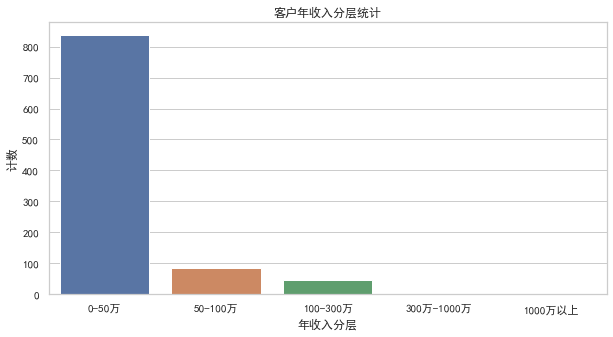

In [18]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户年收入分层统计")
order2=["0-50万","50-100万",'100-300万','300万-1000万','1000万以上']

sns.countplot(nsr["年收入分层"],order=order2)
plt.ylabel("计数")

plt.show()

### 客户性别
基本1：1，没有显著的其他结果

In [19]:
customer_info["K"].value_counts()

女    4520
男    4509
Name: K, dtype: int64

### 客户风险等级


In [20]:
customer_info['L'].value_counts()

C4积极型    4857
C3稳健型    3086
C2谨慎型     634
未评级       350
C5激进型      78
C1保守型      68
Name: L, dtype: int64

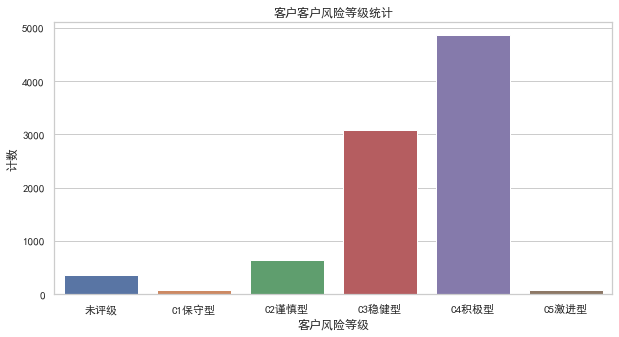

In [21]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户客户风险等级统计")
order3=["未评级","C1保守型",'C2谨慎型','C3稳健型','C4积极型','C5激进型']

sns.countplot(customer_info['L'],order=order3)
plt.ylabel("计数")
plt.xlabel('客户风险等级')
plt.show()

### 盈亏金额
要不极低 要不极高

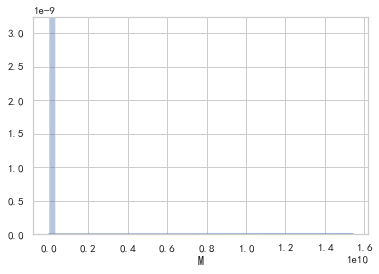

In [22]:
sns.distplot(customer_info['M'])

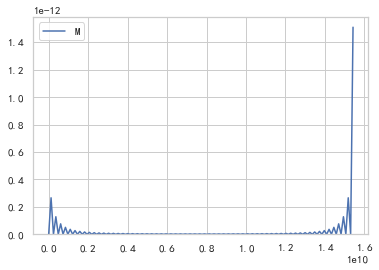

In [23]:
sns.kdeplot(customer_info['M'])

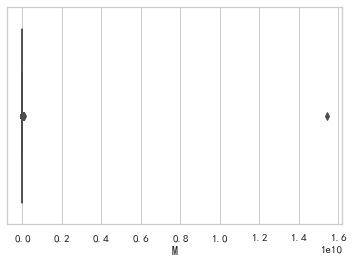

In [24]:
sns.boxplot(customer_info['M'])

因为客户的盈亏率相差很大，不能整体。最大值15424560000，最小值为-3858228.23 因此分为盈亏两类来看，并且去掉最大值

In [25]:
ying = customer_info[~(customer_info['M']==customer_info['M'].max()) & (customer_info['M']>0)].M
ying

0        61593.48
2       140225.95
3       134985.28
4        63339.49
5          981.69
          ...    
9056     28416.49
9059    295246.56
9060    587399.72
9064    455152.67
9072     28128.26
Name: M, Length: 5378, dtype: float64

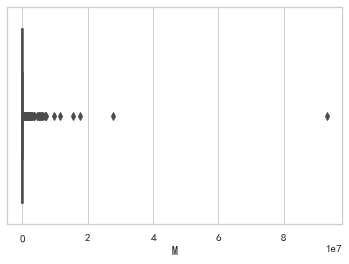

In [26]:
sns.boxplot(ying)

In [27]:
kui = customer_info[customer_info['M']<0].M
kui=kui.astype('int')

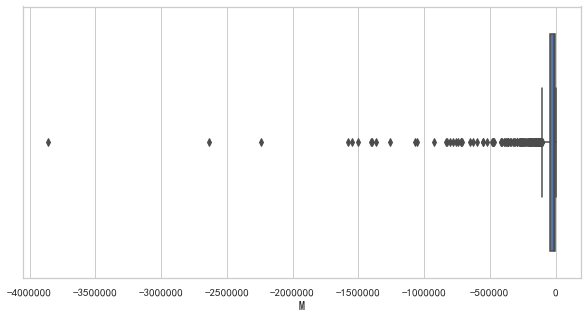

In [28]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
sns.boxplot(kui)
plt.show()

### 盈亏率

In [29]:
customer_info['YKL'].describe()

count      9073.000000
mean        -28.390281
std        2435.574019
min     -180037.339900
25%           0.000000
50%           0.000212
75%           0.007371
max       60255.594580
Name: YKL, dtype: float64

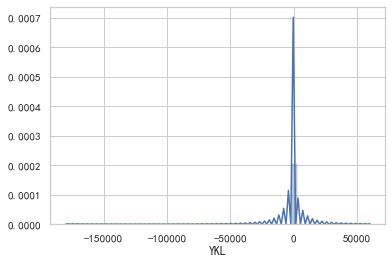

In [30]:
sns.distplot(customer_info['YKL'])

### 银证转账净流入金额

In [31]:
pd.set_option('float_format', lambda x: '%.3f' % x)
customer_info['DY'].describe()

count        9073.000
mean       -23311.622
std        855828.164
min     -43733188.220
25%             0.000
50%             0.000
75%             0.000
max      10000000.000
Name: DY, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



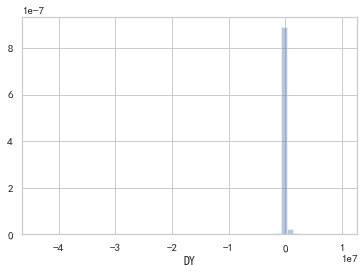

In [33]:
sns.distplot(customer_info['DY'])

### 年均总资产

In [34]:
len(customer_info[customer_info['NJZZC']==0])

1559

In [35]:
njzzc=customer_info[["NJZZC"]]

In [36]:
def nj_seg(x):
    if x<500000:
        return str("0-50万")
    elif x<1000000:
        return str("50-100万")
    elif x<3000000:
        return str("100-300万")
    elif x<10000000:
        return str("300-1000万")
    else:
        return str("1000以上")

njzzc["NJZZCFC"]=njzzc["NJZZC"].apply(lambda x: nj_seg(x))
njzzc["NJZZCFC"].value_counts()



0-50万        7716
50-100万       693
100-300万      505
300-1000万     132
1000以上         27
Name: NJZZCFC, dtype: int64

In [39]:
njzzczb=njzzc["NJZZCFC"].value_counts().rename_axis('年均总收入占比').reset_index(name='计数')
length=len(njzzc)
njzzczb["占比(%)"]=njzzczb["计数"].apply(lambda x: round(x/length*100,2))
njzzczb.head(10)

,年均总收入占比,计数,占比(%)
0,0-50万,7716,85.040
1,50-100万,693,7.640
2,100-300万,505,5.570
3,300-1000万,132,1.450
4,1000以上,27,0.300


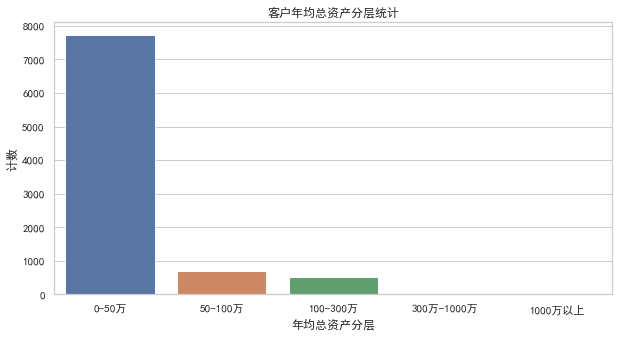

In [40]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户年均总资产分层统计")
order2=["0-50万","50-100万",'100-300万','300万-1000万','1000万以上']

sns.countplot(njzzc["NJZZCFC"],order=order2)
plt.ylabel("计数")
plt.xlabel("年均总资产分层")
plt.show()

### 佣金率

In [41]:
customer_info.BJ.describe()

count   9073.000
mean       1.075
std        0.941
min        0.160
25%        0.300
50%        0.500
75%        2.500
max        3.000
Name: BJ, dtype: float64

In [42]:
yjl=customer_info[['BJ']]

In [43]:
def yjl_seg(x):
    if x<0.3:
        return str("0-0.3")
    elif x<0.8:
        return str("0.3-0.8")
    elif x<1.6:
        return str("0.8-1.6")
    else:
        return str("1.6-3")


yjl["YJLFC"]=yjl["BJ"].apply(lambda x: yjl_seg(x))
yjl["YJLFC"].value_counts()



0.3-0.8    4384
1.6-3      2636
0.8-1.6    1213
0-0.3       840
Name: YJLFC, dtype: int64

In [44]:
yjlzb=yjl["YJLFC"].value_counts().rename_axis('佣金率占比').reset_index(name='计数')
length=len(yjl)
yjlzb["占比(%)"]=yjlzb["计数"].apply(lambda x: round(x/length*100,2))
yjlzb.head(10)

,佣金率占比,计数,占比(%)
0,0.3-0.8,4384,48.320
1,1.6-3,2636,29.050
2,0.8-1.6,1213,13.370
3,0-0.3,840,9.260


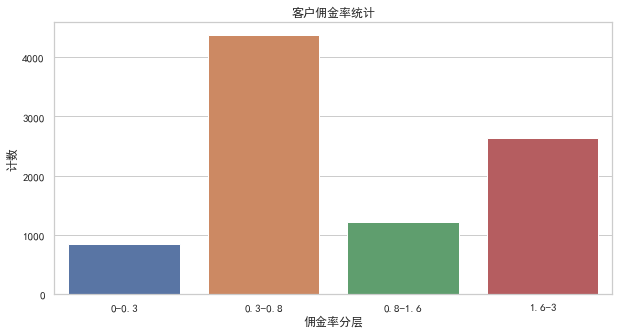

In [45]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid",font='SimHei')
plt.title("客户佣金率统计")
order2=["0-0.3","0.3-0.8",'0.8-1.6','1.6-3']

sns.countplot(yjl["YJLFC"],order=order2)
plt.ylabel("计数")
plt.xlabel("佣金率分层")
plt.show()

### 换手率

In [46]:
customer_info['BH'].describe()

count      9073.000
mean        758.798
std       45939.462
min           0.000
25%           0.000
50%           0.000
75%           3.150
max     3869000.000
Name: BH, dtype: float64

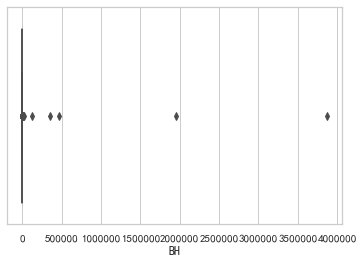

In [47]:
sns.boxplot(customer_info['BH'])

有两个数据异常大，可以重点关注分析。
去掉大于10万的值，分析总体

In [48]:
temp=customer_info[~(customer_info['BH']>10)].BH
temp.describe()

count   7793.000
mean       1.022
std        2.046
min        0.000
25%        0.000
50%        0.000
75%        0.990
max       10.000
Name: BH, dtype: float64

Text(0.5, 1.0, '换手率为0—10的分布')

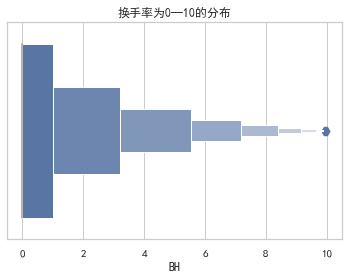

In [49]:
sns.boxenplot(temp)
plt.title("换手率为0—10的分布")

In [50]:
customer_info[(customer_info['BH']>10)&(customer_info['BH']<100)].BH.describe()

count   1121.000
mean      29.447
std       20.993
min       10.030
25%       13.700
50%       21.790
75%       38.390
max       99.890
Name: BH, dtype: float64

Text(0.5, 1.0, '换手率为10—100的分布')

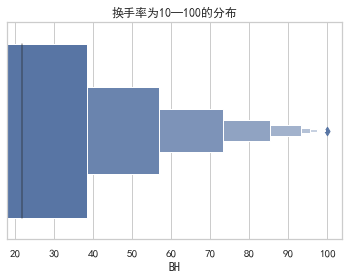

In [51]:

sns.boxenplot(customer_info[(customer_info['BH']>10)&(customer_info['BH']<100)].BH)
plt.title("换手率为10—100的分布")


### 总成交量
有4636，过半的客户没有成交量，以下分析去零

In [52]:
len(customer_info[customer_info['ZCJL']==0])

4636

In [53]:
customer_info[~(customer_info['ZCJL']==0)].ZCJL.describe()

count        4437.000
mean      5115729.508
std      22858398.639
min            20.110
25%        133222.000
50%        641211.800
75%       2920313.000
max     758581094.950
Name: ZCJL, dtype: float64

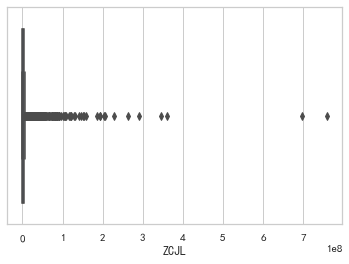

In [54]:
sns.boxplot(customer_info[~(customer_info['ZCJL']==0)].ZCJL)

In [55]:
print("大于10万成交量的用户数量:",len(customer_info[customer_info['ZCJL']>100000]))
print("大于10万成交量的用户占比:",round(3501/9073*100,2),'%')

大于10万成交量的用户数量: 3501
大于10万成交量的用户占比: 38.59 %


大部分还是集中在很低的成交量或者没有，38%的客户总成交量在十万以上

### 固收类产品平均保有量
8619个 为0， 以下分析去0分析

In [56]:
customer_info['GSLCPBYL'].describe()

count       9073.000
mean       20863.542
std       287099.200
min         -373.794
25%            0.000
50%            0.000
75%            0.000
max     15000000.000
Name: GSLCPBYL, dtype: float64

In [57]:
len(customer_info[customer_info['GSLCPBYL']==0])

8619

In [58]:
customer_info[~(customer_info['GSLCPBYL']==0)].GSLCPBYL.describe()

count        454.000
mean      416949.156
std      1218683.863
min         -373.794
25%        39532.239
50%       110307.528
75%       358500.000
max     15000000.000
Name: GSLCPBYL, dtype: float64

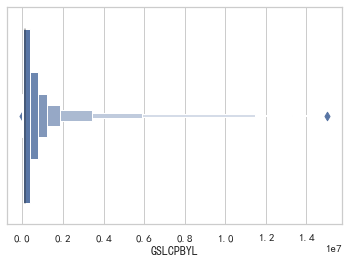

In [59]:
sns.boxenplot(customer_info[~(customer_info['GSLCPBYL']==0)].GSLCPBYL)

### 权益类产品平均保有量  
有8517个0值，去0分析

In [60]:
customer_info['QYLCPPJBYL'].describe()

count       9073.000
mean       14461.679
std       200349.450
min        -1313.336
25%            0.000
50%            0.000
75%            0.000
max     13384446.380
Name: QYLCPPJBYL, dtype: float64

In [61]:
len(customer_info[customer_info['QYLCPPJBYL']==0])

8517

In [62]:
customer_info[~(customer_info['QYLCPPJBYL']==0)].QYLCPPJBYL.describe()

count        556.000
mean      235990.671
std       777014.605
min        -1313.336
25%         4075.400
50%        33231.528
75%       172714.581
max     13384446.380
Name: QYLCPPJBYL, dtype: float64

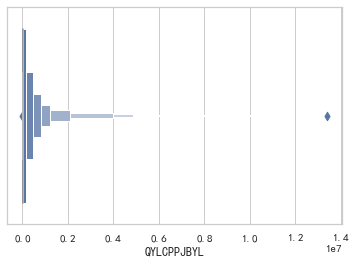

In [63]:
sns.boxenplot(customer_info[~(customer_info['QYLCPPJBYL']==0)].QYLCPPJBYL)

## 数据指标的相关性分析

### 数据集清理

In [64]:
temp_corr= pd.read_csv("./data/TEMP_CORR.csv",low_memory=False)

In [65]:
temp_corr.isna().sum()

客户号              0
客户经理             0
开户日期             0
客户状态             0
开户规范信         1135
              ... 
现场客户             0
信用账户偏好手机委托       0
信用账户偏好网上委托       0
固收类产品平均保有量       0
权益类产品平均保有量       0
Length: 180, dtype: int64

可见，E列有缺失值，接下来去掉缺失值,缺失值为0

In [66]:
temp_corr=temp_corr.fillna(0)
customer_info=customer_info.fillna(0)

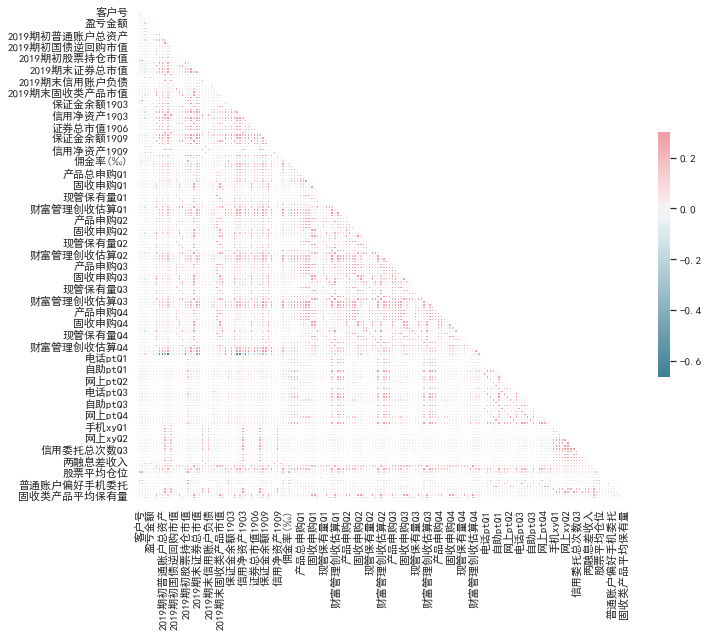

<Figure size 103680x103680 with 0 Axes>

In [67]:
sns.set(style="white")
sns.set(style="whitegrid",font='SimHei')
corr = temp_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.figure(figsize=(1440,1440))
plt.show()


In [68]:
s = temp_corr.corr().unstack()
a=s[(s.abs()>0.8) & (s.abs()<1.0)]
a=pd.DataFrame(a)
a.to_csv('./data/correlation.csv',index=True,encoding='utf_8_sig')

# 建模

##  数据准备

In [69]:
data = customer_info

### 添加列

In [70]:
#委托次数
data['WTCS']=data['EE']+data['EK']+data['EQ']+data['EW']
#普通账户证券交易净佣金
data['PTZHZQJYJYJ']=data['BY']+data['CO']+data['DE']+data['DU']
#财富管理创收
data['CFGLCS']=data['BZ']+data['CP']+data['DF']+data['DV']
#信用委托次数
data['XYWTCS']=data['EZ']+data['FC']+data['FF']+data['FI']

### 利润贡献趋势
在判断利润贡献时，我们考虑了普通账户净佣金贡献，财富管理创收贡献和信用账户净佣金贡献（息差我们不考虑，因为是年粒度）。在这个过程中，我们赋予他们相同的权重（因为是三个很重要的判断利润贡献的指标）。

利润贡献=普通账户净佣金+财富管理创收+信用委托次数

在多指标评价体系中，由于各评价指标的性质不同，通常具有不同的量纲和数量级。当各指标间的水平相差很大时，如果直接用原始指标值进行分析，就会突出数值较高的指标在综合分析中的作用，相对削弱数值水平较低指标的作用。因此，为了保证结果的可靠性，需要对原始指标数据进行标准化处理。 **关键词：数据标准化**


- 第一步：对三个变量分别数据标准化, z = (x - u) / s 
- 第二步：求和，计算每个季度的利润贡献，制造一个时间序列
- 第三步：这里用最小二乘法拟合一条直线，我们用这条直线的斜率，作为这个字段的结果。



In [71]:
LR=customer_info[['BY','BZ','EZ','CO','CP','FC','DE','DF','FF','DU','DV','FI']]
LR_No=LR

In [72]:
for i in LR:
    LR_No[i]=StandardScaler().fit_transform(LR[i].values.reshape(-1,1))

LR_No['A']=customer_info['A']
LR_No.head(5)
#标准化结束

,BY,BZ,EZ,CO,CP,FC,DE,DF,FF,DU,DV,FI,A
0,-0.064,-0.078,-0.046,-0.099,-0.081,-0.045,-0.118,-0.094,-0.043,-0.100,-0.103,-0.038,1
1,4.508,-0.078,-0.046,-0.161,-0.081,-0.045,-0.120,-0.094,-0.043,0.171,-0.103,-0.038,2
2,-0.020,-0.078,-0.046,-0.113,-0.081,-0.045,-0.095,-0.029,-0.043,-0.065,-0.033,-0.038,3
3,-0.146,-0.054,-0.046,-0.150,-0.071,-0.045,-0.117,-0.076,-0.043,-0.097,-0.103,-0.038,4
4,-0.147,-0.075,-0.046,-0.161,-0.078,-0.045,-0.120,-0.090,-0.043,-0.101,-0.099,-0.038,5


In [73]:
LRGXL=LR_No[['A']]
LRGXL['S1']= LR_No['BY']+LR_No['BZ']+LR_No['EZ']
LRGXL['S2']= LR_No['CO']+LR_No['CP']+LR_No['FC']
LRGXL['S3']= LR_No['DE']+LR_No['DF']+LR_No['FF']
LRGXL['S4']= LR_No['DU']+LR_No['DV']+LR_No['FI']
LRGXL=LRGXL.drop(columns=['A'])
LRGXL

,S1,S2,S3,S4
0,-0.188,-0.226,-0.255,-0.241
1,4.385,-0.287,-0.257,0.030
2,-0.144,-0.239,-0.166,-0.136
3,-0.245,-0.266,-0.236,-0.238
4,-0.268,-0.283,-0.253,-0.238
...,...,...,...,...
9068,-0.271,-0.287,-0.257,-0.242
9069,-0.271,-0.287,-0.257,-0.242
9070,-0.271,-0.287,-0.257,-0.242
9071,-0.271,-0.287,-0.257,-0.242



**拿第一行的数据来拟合一下,你看明白整个过程**

    value  season
S1 -0.188       1
S2 -0.226       2
S3 -0.255       3
S4 -0.241       4


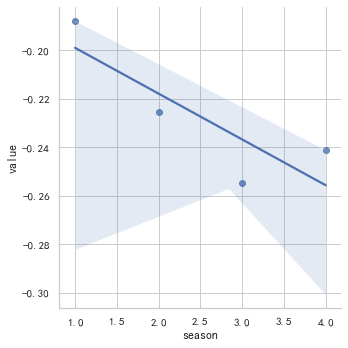

In [74]:
a=LRGXL.iloc[:1].transpose()
a['seson']=[1,2,3,4]
a.columns=["value",'season']
print(a)
sns.lmplot(x='season',y='value',data=a)

plt.show()

#四个点在下图里面点出来了，肉眼可以看见总体是走下行的，但是还是要算出具体斜率,这个斜率就作为利润趋势贡献的结果。

In [75]:
temp=[]
for i in range(0,len(LRGXL)):
    x =  np.array([[1,2,3,4],LRGXL.iloc[i].transpose().to_numpy().reshape(4)])
    r = stats.linregress(x)
    temp.append(r.slope)
    
data['LRGXQS']=temp  

In [76]:
data['LRGXQS'].head(10)

0   -0.019
1   -1.303
2    0.010
3    0.005
4    0.012
5   -0.002
6   -0.444
7    0.001
8   -0.011
9    0.022
Name: LRGXQS, dtype: float64

In [77]:
data.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       ...
       'XYZHPHWSWT', 'GSLCPBYL', 'QYLCPPJBYL', 'KHSC', 'NLFC', 'WTCS',
       'PTZHZQJYJYJ', 'CFGLCS', 'XYWTCS', 'LRGXQS'],
      dtype='object', length=187)

### 风险等级
这里是做数据准备 未评级，C1-C5 对应0-5

In [78]:
data['FXDJ']=customer_info['L']
def xy_level(x):
    if x=="未评级":
        return 0
    elif x=='C1保守型':
        return 1
    elif x=="C2谨慎型":
        return 2
    elif x=="C3稳健型":
        return 3
    elif x=="C4积极型":
        return 4
    else:
        return 5
data['FXDJ']=customer_info['L'].apply(lambda x: xy_level(x))
data['FXDJ'].head(5)

0    4
1    4
2    4
3    4
4    5
Name: FXDJ, dtype: int64

### 用于建立模型的dataframe
以下这个表就是用来建模和分类的那个表了，全是树图里树叶指标

In [79]:
model=data[['BH','WTCS','PTZHZQJYJYJ','CFGLCS','LRXCSR','XYWTCS','YKL','KTDYWZLS','BJ','KHSC','LRGXQS','NJZZC','BG','FXDJ','G']]
model=model.fillna(0)
model

,BH,WTCS,PTZHZQJYJYJ,CFGLCS,LRXCSR,XYWTCS,YKL,KTDYWZLS,BJ,KHSC,LRGXQS,NJZZC,BG,FXDJ,G
0,1.760,24,262.750,0.000,0.000,0,0.003,0,0.250,6118,-0.019,933880.496,68422.290,4,64.070
1,8.200,32,9270.780,0.000,0.000,0,-0.017,0,2.500,5020,-1.303,469174.178,120212.380,4,42.080
2,1.840,112,432.000,130.000,0.000,0,0.005,2,0.300,8945,0.010,1120934.852,18366.930,4,56.020
3,0.260,16,31.410,59.250,0.000,0,0.007,1,0.250,9473,0.005,762917.238,12268.750,4,64.100
4,0.000,0,0.000,14.560,0.000,0,0.007,1,2.500,9472,0.012,375626.968,0.000,5,55.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,0.000,0,0.000,0.000,0.000,0,0.000,0,0.800,370,0.012,0.400,0.000,4,37.110
9069,0.000,0,0.000,0.000,0.000,0,0.000,0,0.800,370,0.012,0.400,0.000,4,19.080
9070,0.000,0,0.000,0.000,0.000,0,0.000,0,0.800,370,0.012,0.300,0.000,4,40.000
9071,0.000,0,0.000,0.000,0.000,0,0.000,0,0.800,370,0.012,0.400,0.000,4,20.110


In [80]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BH           9073 non-null   float64
 1   WTCS         9073 non-null   int64  
 2   PTZHZQJYJYJ  9073 non-null   float64
 3   CFGLCS       9073 non-null   float64
 4   LRXCSR       9073 non-null   float64
 5   XYWTCS       9073 non-null   int64  
 6   YKL          9073 non-null   float64
 7   KTDYWZLS     9073 non-null   int64  
 8   BJ           9073 non-null   float64
 9   KHSC         9073 non-null   int64  
 10  LRGXQS       9073 non-null   float64
 11  NJZZC        9073 non-null   float64
 12  BG           9073 non-null   float64
 13  FXDJ         9073 non-null   int64  
 14  G            9073 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 1.0 MB


总共15列，9073行，没有缺失值了。

## PCA+Kmeans 建模一

PCA降维原理：将多维度数据压缩，保留最主要的信息维度，去掉那些不重要的，这就是PCA降维。注意：降维后的特征数据与原特征数据没有业务含义上的联系了，它是由一个高维空间投影到一个低维空间，里面的数据被投影转换到另一个维度上了，因此具体数值已经没有了原先的业务含义。举个例子，上述24维度包括本日收入、耗币数量、广场客流等，压缩成12个维度后就没有对应的12个业务概念了，这么做只是为了存留最主要的信息从而便于后续更有效的处理和分析数据。

PCA具体执行过程如下：

标准化原始维度数据（实质只需要减均值即可，不必标准化方差）；
计算出多维特征的协方差矩阵，从而得到矩阵的特征值和特征向量；
将特征值从大到小排序，选取前k个主成分，找到其对应的k个特征向量；
将原始维度数据投影到选取的k个特征向量上，原始数据特征的维度就变成了k维；
可以用这k维数据代表原始大维度的数据，进行后续数据处理分析。

### PCA降维前相关度分析
可以从下图中看出，所有参与计算的指标都无相关或弱相关，绝对值都在0-0.3之间。预计降维程度不会很大。

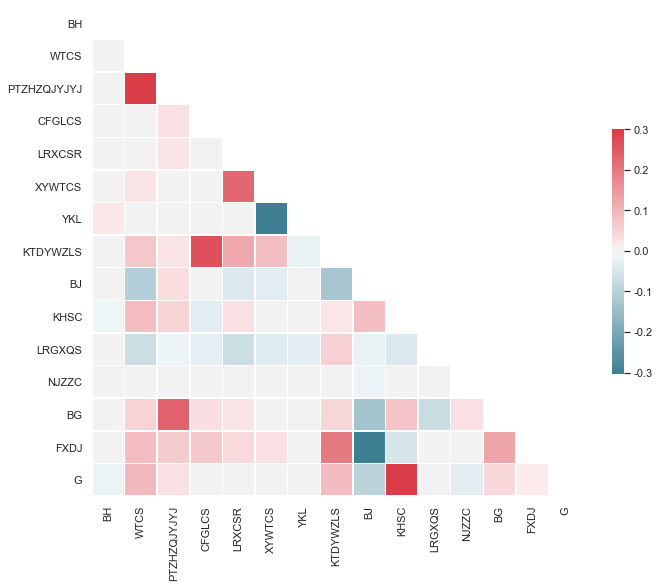

<Figure size 103680x103680 with 0 Axes>

In [81]:
sns.set(style="white")
# 计算模型的相关性矩阵
corr =model.corr()
# 因为相关性举证是对称的，所以，右上角的那一半以及对角线就遮住了
mask = np.triu(np.ones_like(corr, dtype=np.bool))


# 画图
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.figure(figsize=(1440,1440))
plt.show()


### PCA 降维前标准化

**为什么要做标准化？** 

PCA(主成分分析)所对应的数学理论是SVD(矩阵的奇异值分解）。而奇异值分解本身是完全不需要对矩阵中的元素做标准化或者去中心化的。
但是对于机器学习，我们通常会对矩阵的每一列先进行标准化。PCA通常是用于高维数据的降维，它可以将原来高维的数据投影到某个低维的空间上并使得其方差尽量大。如果数据其中某一特征（矩阵的某一列）的数值特别大，那么它在整个误差计算的比重上就很大，那么可以想象在投影到低维空间之后，为了使低秩分解逼近原数据，整个投影会去努力逼近最大的那一个特征，而忽略数值比较小的特征。因为在建模前我们并不知道每个特征的重要性，这很可能导致了大量的信息缺失。为了“公平”起见，防止过分捕捉某些数值大的特征，我们会对每个特征先进行标准化处理，使得它们的大小都在相同的范围内，然后再进行PCA。

此外，从计算的角度讲，PCA前对数据标准化还有另外一个好处。因为PCA通常是数值近似分解，而非求特征值、奇异值得到解析解，所以当我们使用梯度下降等算法进行PCA的时候，我们最好先要对数据进行标准化，这是有利于梯度下降法的收敛。


Scikit-learn 中StandScaler,是对列的标准化，这里和前面利润贡献趋势运用标准化的原理一致。 公式都是 z = (x - u) / s

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [82]:
model.head(5)

,BH,WTCS,PTZHZQJYJYJ,CFGLCS,LRXCSR,XYWTCS,YKL,KTDYWZLS,BJ,KHSC,LRGXQS,NJZZC,BG,FXDJ,G
0,1.760,24,262.750,0.000,0.000,0,0.003,0,0.250,6118,-0.019,933880.496,68422.290,4,64.070
1,8.200,32,9270.780,0.000,0.000,0,-0.017,0,2.500,5020,-1.303,469174.178,120212.380,4,42.080
2,1.840,112,432.000,130.000,0.000,0,0.005,2,0.300,8945,0.010,1120934.852,18366.930,4,56.020
3,0.260,16,31.410,59.250,0.000,0,0.007,1,0.250,9473,0.005,762917.238,12268.750,4,64.100
4,0.000,0,0.000,14.560,0.000,0,0.007,1,2.500,9472,0.012,375626.968,0.000,5,55.030


处理前，一些列的值只有零点几，而一些列的值好十几万，这个影响很大，所以接下来我们做标准化

In [83]:
for i in model.columns:
    model[i] = StandardScaler().fit_transform(model[i].values.reshape(-1, 1))
model

,BH,WTCS,PTZHZQJYJYJ,CFGLCS,LRXCSR,XYWTCS,YKL,KTDYWZLS,BJ,KHSC,LRGXQS,NJZZC,BG,FXDJ,G
0,-0.016,-0.152,-0.105,-0.093,-0.060,-0.044,0.012,-0.345,-0.877,1.103,-0.043,0.007,0.807,0.686,0.901
1,-0.016,-0.129,1.253,-0.093,-0.060,-0.044,0.012,-0.345,1.515,0.611,-2.990,-0.007,1.634,0.686,-0.483
2,-0.016,0.100,-0.079,-0.061,-0.060,-0.044,0.012,3.692,-0.824,2.371,0.022,0.013,0.009,0.686,0.395
3,-0.017,-0.175,-0.139,-0.078,-0.060,-0.044,0.012,1.674,-0.877,2.608,0.011,0.002,-0.088,0.686,0.903
4,-0.017,-0.221,-0.144,-0.090,-0.060,-0.044,0.012,1.674,1.515,2.607,0.027,-0.010,-0.284,1.744,0.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,-0.017,-0.221,-0.144,-0.093,-0.060,-0.044,0.012,-0.345,-0.292,-1.475,0.027,-0.022,-0.284,0.686,-0.796
9069,-0.017,-0.221,-0.144,-0.093,-0.060,-0.044,0.012,-0.345,-0.292,-1.475,0.027,-0.022,-0.284,0.686,-1.931
9070,-0.017,-0.221,-0.144,-0.093,-0.060,-0.044,0.012,-0.345,-0.292,-1.475,0.027,-0.022,-0.284,0.686,-0.614
9071,-0.017,-0.221,-0.144,-0.093,-0.060,-0.044,0.012,-0.345,-0.292,-1.475,0.027,-0.022,-0.284,0.686,-1.866


### PCA建模

在实践中使用PCA的重要部分是能够估计需要多少个组件来描述数据，二维投影会丢失大量信息（通过方差衡量），从下图中并且我们需要大约10个分量才能保留80％的方差。一般我们用这个图来辅助权衡具体降为几个主成分，保留百分之多少的信息。

下图是在PCA前维度特别大，有很多列是有相关性的）的PCA损失图。
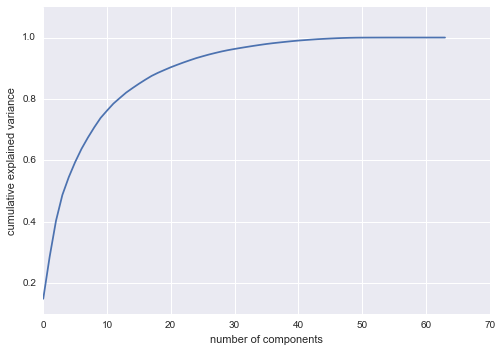

以下这个图可以通过查看cumsum的方差比作为组件数量的函数来确定，也就是方差的损失比例，如果降维过度导致PCA降维损失太大，对后面的分类有一定影响。


Text(0, 0.5, 'cumulative explained variance')

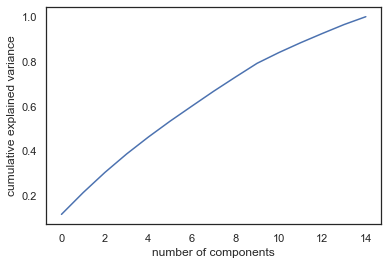

In [84]:
pca = PCA().fit(model)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

但因为数据维度不算高，各维的相关度也不高，因此可以看出保留90%的信息需要12个维度， 比原先降了3维。

In [85]:
# PCA
pca = PCA(n_components=0.9)# 保证降维后的数据保持90%的信息

pcaMatrix=pca.fit(model)
pcaMatrix=pca.transform(model)
pcaDF=pd.DataFrame(pcaMatrix)
print("各主成分的方差值占总方差的比例：",pca.explained_variance_ratio_)
print("\n各主成分的方差值：",pca.explained_variance_)
print("\n降维后保留的主成分个数： ", pca.n_components_)
pcaDF

各主成分的方差值占总方差的比例： [0.1168436  0.097383   0.09015482 0.08255399 0.07562236 0.0709467
 0.06703956 0.06639337 0.06317327 0.06176099 0.04785169 0.0439813
 0.04131865]

各主成分的方差值： [1.75284721 1.46090606 1.35247143 1.23844629 1.1344605  1.06431777
 1.00570418 0.99601026 0.94770355 0.92651696 0.71785447 0.65979217
 0.61984812]

降维后保留的主成分个数：  13


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.028,-0.791,-0.011,-0.646,-0.999,-0.380,0.299,0.145,-0.595,0.263,-0.037,0.477,-0.092
1,0.700,-1.124,-0.027,2.046,1.047,-1.815,0.491,-0.276,-1.851,-0.351,-1.513,-0.427,0.026
2,2.490,-0.255,0.349,-2.329,0.539,0.167,0.056,0.228,0.244,-0.001,-0.795,-2.238,0.036
3,1.760,-1.003,0.578,-2.026,-0.267,-0.113,0.165,0.260,-0.027,-0.029,-0.680,-0.701,-0.044
4,1.112,-0.964,0.763,-1.579,0.764,0.074,0.101,0.300,-0.052,0.120,-2.787,-0.732,-0.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,-0.508,1.384,-0.804,0.511,-0.422,-0.043,-0.159,-0.221,0.078,-0.190,-0.198,0.250,0.030
9069,-0.808,1.896,-1.031,0.987,-0.258,-0.058,-0.175,-0.277,0.091,-0.122,-0.360,0.111,-0.034
9070,-0.460,1.302,-0.767,0.435,-0.449,-0.040,-0.156,-0.212,0.076,-0.201,-0.172,0.273,0.041
9071,-0.791,1.866,-1.018,0.960,-0.267,-0.057,-0.174,-0.274,0.090,-0.126,-0.351,0.119,-0.030


### K-means 聚类

Kmeans是一种无监督的机器学习算法，将一组数据分为k个类别，是一个迭代算法。算法如下：
- 随机选择k个点，这K个点作为聚类中心（cluster centroids）
- 对于数据集中的每一个点，根据其距离k个聚类中心点的距离，将其与距离最近的中心点关联起来，与同一个中心点关联的所有点聚成一类。
- 计算每一个组的平均值，将该组所关联的中心点移到平均值的位置。
- 重复步骤2-3，直至中心点不再变化。

在K-means中重要的两个参数主要是
- k，这个决定了具体分为多少类
- max_iter,最大迭代次数，若最大迭代次数太少，上述步骤四中描述的“直至中心点不再变化”无法实现

K值的选择有多种方法，常用的就是Elbow Method 和 Calinski-Harabasz Score

- Elbow Method 就是找到一个拐点，如下图，k=5的时候 就像在手肘的拐点一样，这时候是最佳的
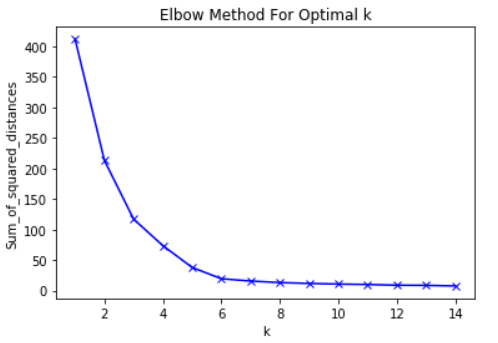

- Calinski-Harabasz Score 是一个公式，根据训练集样本数，类别数，类间协方差矩阵，类内协方差矩阵和矩阵的迹算出来的一个值，值越大，表现越好

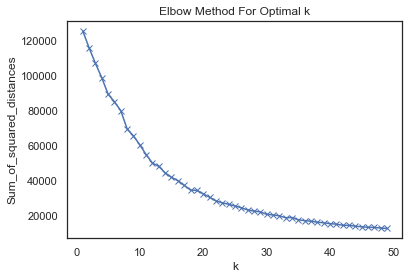

In [86]:
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k,init='k-means++')
    km = km.fit(pcaDF)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method 明显的拐点在20附近，所以我们用 Calinski-Harabasz Score 看

In [87]:
for k in range(2, 50):
    kmeans_model = KMeans(n_clusters=k, random_state=1,init='k-means++').fit(pcaDF)
    labels = kmeans_model.labels_
    print ("k=",k ,', score=', calinski_harabasz_score(pcaDF,labels))

k= 2 , score= 759.9384651539455
k= 3 , score= 787.031066579805
k= 4 , score= 793.684461368689
k= 5 , score= 803.4936634825882
k= 6 , score= 830.6316969789455
k= 7 , score= 873.6099970235355
k= 8 , score= 967.2716392865414
k= 9 , score= 998.589434135829
k= 10 , score= 1077.9797474133022
k= 11 , score= 1152.3724554428434
k= 12 , score= 1209.1893034573686
k= 13 , score= 1190.5162906997396
k= 14 , score= 1209.5059174249086
k= 15 , score= 1253.5670375433588
k= 16 , score= 1285.3858501602622
k= 17 , score= 1301.12668105778
k= 18 , score= 1355.048326401252
k= 19 , score= 1372.2143139350449
k= 20 , score= 1357.8545403136243
k= 21 , score= 1438.5601012106815
k= 22 , score= 1445.3345773941894
k= 23 , score= 1449.382943993024
k= 24 , score= 1446.5926464921552
k= 25 , score= 1445.5497336725307
k= 26 , score= 1469.4642128614325
k= 27 , score= 1497.763978536487
k= 28 , score= 1502.6510129333751
k= 29 , score= 1552.1390102841178
k= 30 , score= 1548.9833120157832
k= 31 , score= 1561.5575542800386
k= 3

在这个案例中，由于数据的限制，Calinski-Harabasz Score 在k=40左右到达一个峰值，这个峰值超出了业务逻辑范围，在一个业务逻辑上易于接受的先增大再减小的形状，看完以上数据因此我们选择19，分为19组，分组后每组的客户数据如下：

In [88]:
kmeansmodel = KMeans(n_clusters= 20, init='k-means++', random_state=0)
kmeansmodel.fit_predict(pcaDF)

customer_info["KHFL"]=kmeansmodel.fit_predict(pcaDF)
customer_info["KHFL"].value_counts()


1     2262
18    1999
5     1593
0      998
6      887
11     663
19     431
16     173
8       33
9        8
4        7
3        5
12       4
10       2
7        2
13       2
2        1
17       1
14       1
15       1
Name: KHFL, dtype: int64

## PCA + Kmeans 降维2

### 数据准备
这一步主要取出树图里面所有用到的基础列（由你提供的所有基本数据）取出唯一值。

In [89]:
A=['BH','EE','EK','EQ','EW','BY','CO','DE','DU','BZ','CP','DF','DV','T','AG','EZ','FC','FF','FI','M','Q','AD','AR','AX','BD','KTDYWZLS','BJ','KHSC','LRGXQS','BG','Q','AD','AR','AX','BD','BG','FXDJ','G']
print(len(A))
print(len(set(A)))
model1=data[set(A)]
model1=model1.fillna(0)
model1

38
32


,KHSC,CP,EQ,EZ,FC,EW,CO,DE,DF,DU,...,EK,G,AX,BJ,T,M,BH,BY,LRGXQS,BZ
0,6118,0.000,1,0,0,2,100.660,3.600,0.000,1.960,...,8,64.070,980871.610,0.250,0.000,61593.480,1.760,156.530,-0.019,0.000
1,5020,0.000,0,0,0,2,0.000,0.000,0.000,496.430,...,0,42.080,516707.550,2.500,0.000,-200518.910,8.200,8774.350,-1.303,0.000
2,8945,0.000,15,0,0,24,79.140,48.970,65.000,64.610,...,19,56.020,1121784.890,0.300,0.000,140225.950,1.840,239.280,0.010,0.000
3,9473,11.250,3,0,0,2,16.770,4.810,18.000,6.870,...,6,64.100,752552.290,0.250,0.000,134985.280,0.260,2.960,0.005,30.000
4,9472,3.640,0,0,0,0,0.000,0.000,3.640,0.000,...,0,55.030,272039.140,2.500,0.000,63339.490,0.000,0.000,0.012,3.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,370,0.000,0,0,0,0,0.000,0.000,0.000,0.000,...,0,37.110,0.400,0.800,0.000,0.000,0.000,0.000,0.012,0.000
9069,370,0.000,0,0,0,0,0.000,0.000,0.000,0.000,...,0,19.080,0.400,0.800,0.000,0.000,0.000,0.000,0.012,0.000
9070,370,0.000,0,0,0,0,0.000,0.000,0.000,0.000,...,0,40.000,0.300,0.800,0.000,0.000,0.000,0.000,0.012,0.000
9071,370,0.000,0,0,0,0,0.000,0.000,0.000,0.000,...,0,20.110,0.400,0.800,0.000,0.000,0.000,0.000,0.012,0.000


### 相关度分析
有更多的维度是相关的了，但大都是弱相关,可能降维效果比较明显 从几十到十几

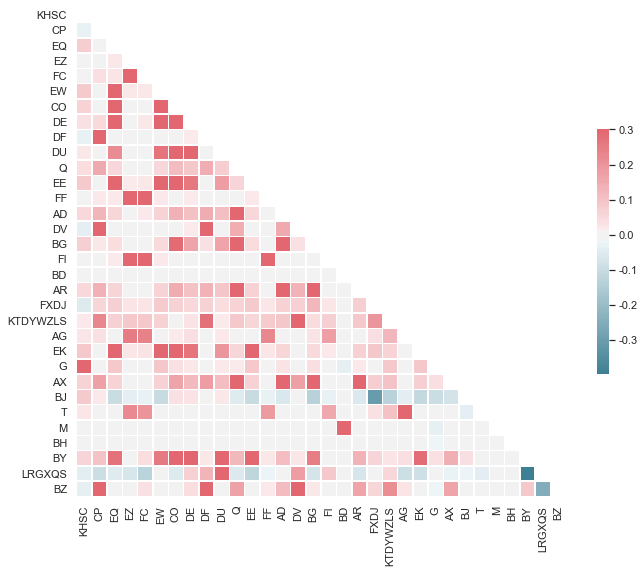

<Figure size 103680x103680 with 0 Axes>

In [90]:
sns.set(style="white")
# 计算模型的相关性矩阵
corr =model1.corr()
# 因为相关性举证是对称的，所以，右上角的那一半以及对角线就遮住了
mask = np.triu(np.ones_like(corr, dtype=np.bool))


# 画图
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.figure(figsize=(1440,1440))
plt.show()

### 数据标准化

In [91]:
for i in model1.columns:
    model1[i] = StandardScaler().fit_transform(model1[i].values.reshape(-1, 1))

### PCA降维

In [92]:

pca = PCA(n_components=0.90)# 保证降维后的数据保持90%的信息
pca.fit(model1)
pcaa=pca.transform(model1)
pcaa=pd.DataFrame(pcaa)
pcaa

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.211,0.262,-0.165,0.798,-0.365,-0.107,0.248,0.192,1.124,-1.132,0.044,-0.839,0.020
1,1.414,-0.414,-0.223,0.710,1.605,-0.060,0.572,-3.773,-0.662,-1.786,0.006,0.511,-1.281
2,0.868,0.548,0.050,0.118,-0.846,-0.145,0.788,1.020,2.028,-1.586,0.118,2.647,-0.822
3,0.191,0.378,-0.003,0.323,-0.540,-0.179,0.584,0.501,2.363,-1.404,0.129,1.007,-0.047
4,-0.141,0.272,0.019,0.022,-0.079,-0.161,0.421,0.049,2.092,-0.671,0.201,2.117,-0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,-0.725,0.038,-0.024,-0.049,0.148,0.117,-0.121,0.513,-1.640,-0.277,-0.105,-0.112,0.339
9069,-0.779,0.071,-0.018,-0.051,0.236,0.186,-0.194,0.528,-2.394,-0.039,-0.136,-0.017,0.066
9070,-0.716,0.033,-0.025,-0.049,0.134,0.106,-0.109,0.511,-1.519,-0.316,-0.100,-0.128,0.383
9071,-0.776,0.069,-0.018,-0.051,0.231,0.182,-0.190,0.527,-2.351,-0.053,-0.134,-0.023,0.082


Text(0, 0.5, 'cumulative explained variance')

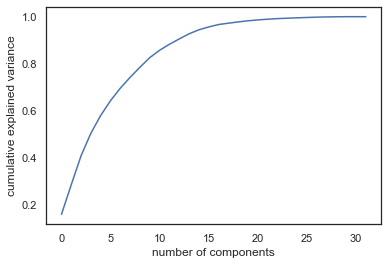

In [93]:
pca = PCA().fit(model1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

这个图就比较理想形状了，可以看到大致在13个主成分能保留90%的方差

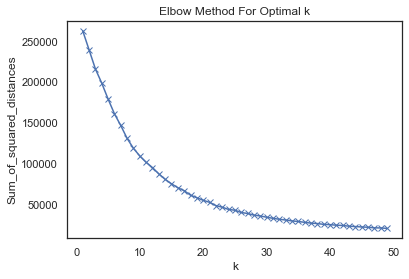

In [94]:
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pcaa)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [95]:
for k in range(2, 50):
    kmeans_model = KMeans(n_clusters=k, random_state=1,init='k-means++').fit(pcaa)
    labels = kmeans_model.labels_
    print ("k=",k ,', score=', calinski_harabasz_score(pcaa,labels))

k= 2 , score= 965.4318174378421
k= 3 , score= 982.3360812330596
k= 4 , score= 998.0382875573986
k= 5 , score= 1072.278157952862
k= 6 , score= 1185.0864214119958
k= 7 , score= 1161.28778751884
k= 8 , score= 1307.0853406871495
k= 9 , score= 1352.6959948632255
k= 10 , score= 1416.6761676503406
k= 11 , score= 1423.0367110632442
k= 12 , score= 1474.006747478144
k= 13 , score= 1525.9242241397578
k= 14 , score= 1563.3464991369744
k= 15 , score= 1589.4235358641852
k= 16 , score= 1643.690223762653
k= 17 , score= 1693.2322156079185
k= 18 , score= 1776.4549478728977
k= 19 , score= 1809.544943470286
k= 20 , score= 1806.0107797085361
k= 21 , score= 1894.6553923432862
k= 22 , score= 1899.7573830663946
k= 23 , score= 1911.4784107780215
k= 24 , score= 1951.8220334985092
k= 25 , score= 1980.9420765231132
k= 26 , score= 2010.1402689748547
k= 27 , score= 2018.036577572993
k= 28 , score= 2071.956369454387
k= 29 , score= 2092.873246400603
k= 30 , score= 2108.363031004479
k= 31 , score= 2118.7968558462862
k

In [96]:
kmeansmodel = KMeans(n_clusters= 20, init='k-means++', random_state=0)
kmeansmodel.fit_predict(pcaa)
customer_info["KHFL1"]=kmeansmodel.fit_predict(pcaa)
customer_info["KHFL1"].value_counts()



18    3688
4     2144
13    1933
0      900
10     181
1      108
19      65
15      30
5        6
8        6
11       2
3        2
12       1
7        1
6        1
2        1
17       1
9        1
14       1
16       1
Name: KHFL1, dtype: int64

## 两种方式的结果总结

In [97]:
print("两种方式分类，得到相同分类结果的比例:",len(customer_info[customer_info['KHFL1']==customer_info['KHFL']].KHFL)/len(customer_info)*100,"%")

两种方式分类，得到相同分类结果的比例: 18.152760939049926 %


由于方法1，根据树状图分出来的类别人数更为均衡，尤其是金字塔底的，而且用户分类的目的就是将用户划分到大小合适的组，以便更好的分析，因此按照原定计划，根据树状图上的15个指标，PCA降维至13个，保留了90%的特征信息，并且我们用Kmeans聚类20类。

# 分类分析

## 聚类结果下的描述性统计分析
**客户分类结果.csv**文件中，KHFL是用你树状图那个指标的分类结果，由于出来效果也不错，我接下来的分析都用这一列来做。
**result_x.csv**文件，是对于每个客户类中的维度做的汇总分析，主要包括：
- count，这个类里总共多少个客户
- mean，这个类中该列的平均值
- std，这个类中该列的方差
- min，25%，50%,75%,max, 分别为 这个类中该列的最小值，四分之一位数，中位数，四分之三分位数和最大值

In [98]:
data.to_csv('./data/客户分类结果.csv', index=False,encoding='utf_8_sig') 

In [99]:
for i in range(0,20):
    a=data[data['KHFL']==i].describe()
    a.to_csv('./data/result/result_'+"%d.csv"%i, index=True,encoding='utf_8_sig') 

In [100]:
data[data['KHFL']==1].describe()

,A,F,G,J,M,N,O,P,Q,R,...,QYLCPPJBYL,KHSC,WTCS,PTZHZQJYJYJ,CFGLCS,XYWTCS,LRGXQS,FXDJ,KHFL,KHFL1
count,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,...,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000,2262.000
mean,6564.284,19724108.462,36.892,1084036.256,22529.763,6298.681,575.975,100529.857,107404.513,0.000,...,164.412,2129.621,27.175,212.479,1.227,0.000,0.005,3.578,1.000,16.937
std,1902.767,1380994.543,7.642,31330426.660,353200.600,34844.421,23940.584,450271.508,457326.091,0.003,...,7550.320,946.218,84.868,917.254,45.041,0.000,0.077,0.652,0.000,3.725
min,1741.000,0.000,0.000,0.000,-1551579.020,0.000,0.000,0.000,0.000,0.000,...,0.000,370.000,0.000,0.000,0.000,0.000,-1.758,1.000,1.000,0.000
25%,4996.250,19780313.000,32.030,0.000,0.000,0.412,0.000,0.000,0.552,0.000,...,0.000,1578.250,0.000,0.000,0.000,0.000,0.012,3.000,1.000,18.000
50%,6949.000,19821222.500,36.110,0.000,0.035,27.080,0.000,0.000,165.205,0.000,...,0.000,1753.000,0.000,0.000,0.000,0.000,0.012,4.000,1.000,18.000
75%,8248.750,19870883.750,41.080,0.000,4537.582,725.620,0.000,39616.250,49423.073,0.000,...,0.000,3038.750,11.000,42.783,0.000,0.000,0.012,4.000,1.000,18.000
max,9072.000,20000810.000,62.100,1100000000.000,15440000.000,692159.590,1134929.570,11095750.000,11196345.750,0.130,...,358985.912,5005.000,1016.000,16501.770,2112.690,0.000,1.174,5.000,1.000,18.000


第 3,12,10,7,13,2,17,14,15 分类结果

In [101]:
data[data['KHFL'].isin([3,12,10,7,13,2,17,14,15]) ]

,A,B,C,D,E,F,G,H,I,J,...,KHSC,NLFC,WTCS,PTZHZQJYJYJ,CFGLCS,XYWTCS,LRGXQS,FXDJ,KHFL,KHFL1
275,276,B26,1996-08-27,正常,证件齐全,19661114.000,53.010,本科,科教,0.000,...,8527,50-70岁,746,1055.550,0.000,3450,2.379,4,3,15
926,927,B63,1998-04-16,正常,0,19650307.000,54.090,本科,自由职业,200000.000,...,7930,50-70岁,1664,3070.280,0.000,2726,-3.833,4,3,15
979,980,B26,1998-06-05,正常,0,19630809.000,56.040,大专,离退休,80000.000,...,7880,50-70岁,275,141809.700,0.000,0,-7.005,4,12,5
1142,1143,B145,1999-06-29,正常,0,19540109.000,65.110,大专,其他,0.000,...,7491,50-70岁,23602,83533.300,0.000,0,-1.553,4,14,6
1707,1708,A6,2005-08-19,正常,0,19680822.000,51.040,大专,自由职业,0.000,...,5248,50-70岁,0,0.000,0.000,21,0.073,4,10,0
1839,1840,A2,2006-12-13,正常,证件齐全,19800703.000,39.050,本科,其他金融机构从业人员（除证券外）,0.000,...,4767,30-40岁,257,442.400,0.000,3289,-3.356,4,3,15
3468,3469,B64,2010-05-11,正常,证件齐全,19800303.000,39.090,本科,党政 ( 在职，离退休 ) 机关干部,0.000,...,3522,30-40岁,0,0.000,0.000,1002,0.628,4,10,0
4177,4178,B145,2010-12-29,正常,证件齐全,19881005.000,31.020,本科,餐饮、旅游服务人员,1500000.000,...,3290,30-40岁,422,83060.020,78028.400,1106,-16.238,4,13,16
4339,4340,B63,2011-03-04,正常,证件齐全,19700422.000,49.080,本科,房地产,450000.000,...,3225,40-50岁,663,1003.570,0.000,6605,-4.634,4,3,14
5507,5508,C20,2012-02-10,正常,证件齐全,19781224.000,41.000,高中,自由职业,0.000,...,2882,40-50岁,873,175845.980,0.000,0,-0.591,4,12,5


你看看要不要合并

## 聚类结果下的指标分布分析
基于: '换手率','委托次数','总成交量','次均成交量','佣金率','盈亏率','年均总资产','开通的业务种类数','股票平均仓位','固收类产品平均保有量','权益类产品平均保有量','固收类产品仓位代表值','权益类产品仓位代表值','开户时间','年龄'做的分布分析

In [102]:
df=pd.read_csv('./data/客户分类结果.csv')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25442 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 25163 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 29575 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 25442 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 25163 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 29575 missing from current font.



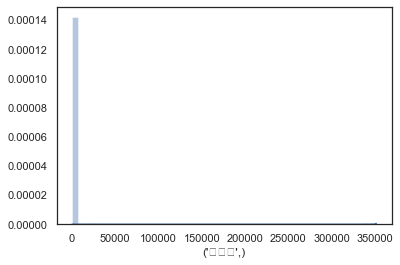

<Figure size 2160x2160 with 0 Axes>

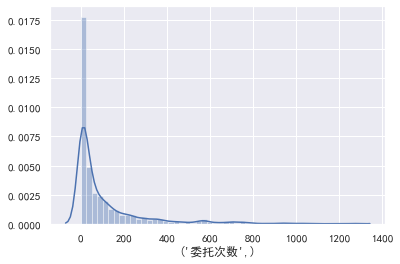

<Figure size 2160x2160 with 0 Axes>

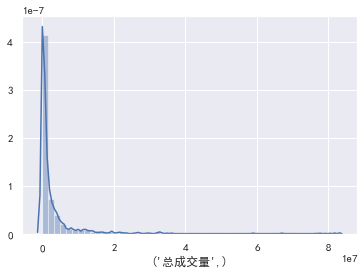

<Figure size 2160x2160 with 0 Axes>

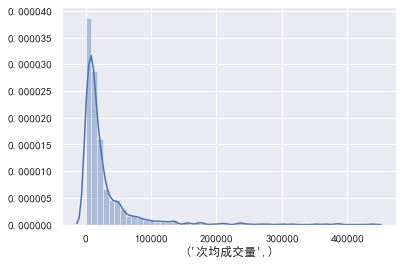

<Figure size 2160x2160 with 0 Axes>

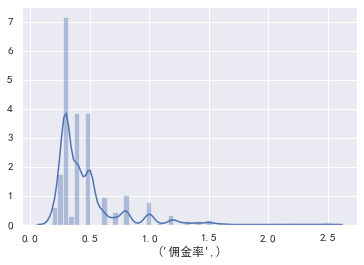

<Figure size 2160x2160 with 0 Axes>

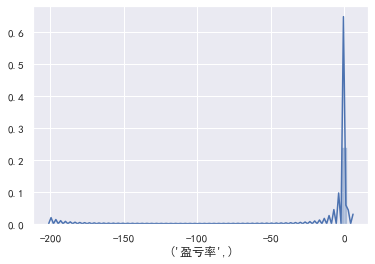

<Figure size 2160x2160 with 0 Axes>

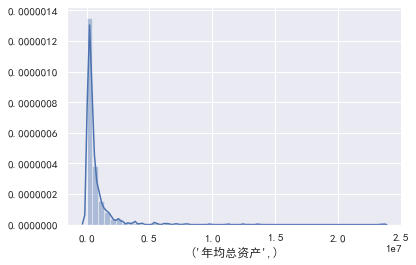

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



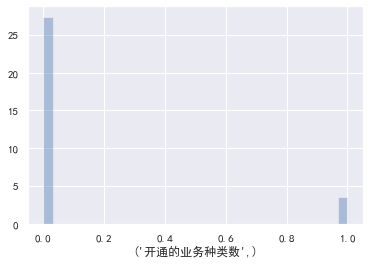

<Figure size 2160x2160 with 0 Axes>

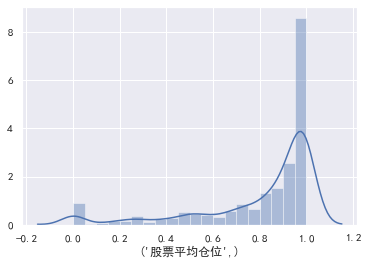

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



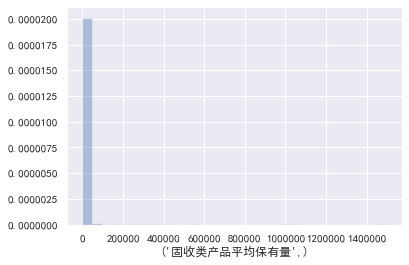

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



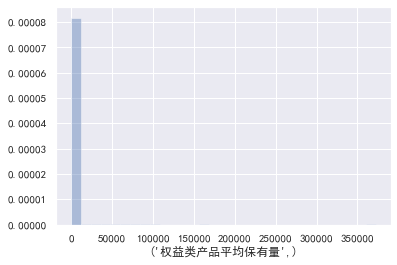

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



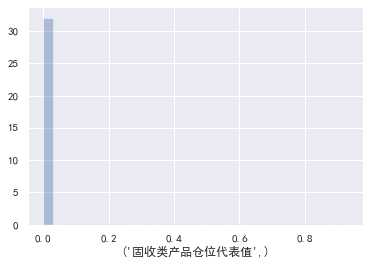

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



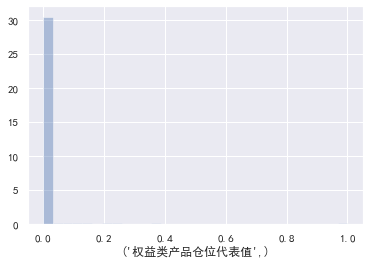

<Figure size 2160x2160 with 0 Axes>

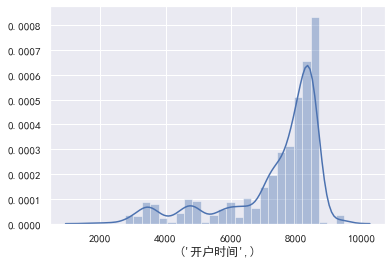

<Figure size 2160x2160 with 0 Axes>

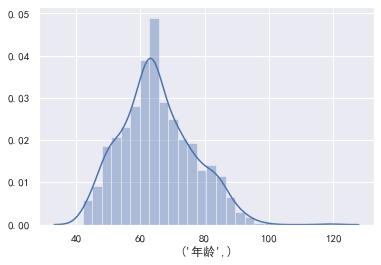

<Figure size 2160x2160 with 0 Axes>

ValueError: could not convert string to float: '女'

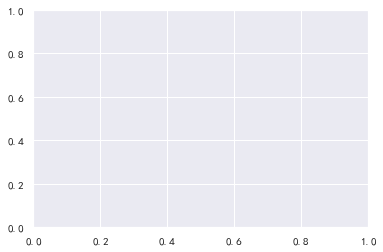

In [103]:
data=data.fillna(0)
for j in range(0,20):
    df=data[data['KHFL']==j]
    wtcs=df['EE']+df['EK']+df['EQ']+df['EW']+df['EZ']+df['FC']+df['FF']+df['FI']
    gppjcw=(df.Z+df.AN)/2
    zb=pd.concat([df.BH,wtcs,df.ZCJL,df.BG,df.BJ,df.YKL,df.NJZZC,df.KTDYWZLS,gppjcw,df.GSLCPBYL,df.QYLCPPJBYL,df.GSLCPCWDBZ,df.QYLCPCWDBZ,df.KHSC,df.G,df.K,df.I,df.H],axis=1)
    zb.columns=[['换手率','委托次数','总成交量','次均成交量','佣金率','盈亏率','年均总资产','开通的业务种类数','股票平均仓位','固收类产品平均保有量','权益类产品平均保有量','固收类产品仓位代表值','权益类产品仓位代表值','开户时间','年龄','性别','职业','学历']]
    zb=zb.dropna()
    for i in zb.columns:
        sns.distplot(zb[i])
        sns.set(font='SimHei')
        plt.figure(figsize=(30,30))
        plt.show()
        

## 聚类结果下的投资偏好分析


In [104]:
print("总体来看")
print("普通账户偏好网上委托：",data['PTZHPHWSWT'].sum())
print("普通账户偏好手机委托：",data['PTZHPHSJWT'].sum())
print("现场客户：",data['XCKH'].sum())
print("信用账户偏好手机委托：",data['XYZHPHSJWT'].sum())
print("信用账户偏好网上委托：",data['XYZHPHWSWT'].sum())



总体来看
普通账户偏好网上委托： 1377
普通账户偏好手机委托： 2688
现场客户： 188
信用账户偏好手机委托： 108
信用账户偏好网上委托： 67


In [105]:
for j in range(0,20):
    print("第",j,"类客户偏好如下")
    print("第",j,'类客户的总数：',len(data[data['KHFL']==j]))
    temp=data[data['KHFL']==j]
    print("普通账户偏好网上委托：",temp['PTZHPHWSWT'].sum())
    print("普通账户偏好手机委托：",temp['PTZHPHSJWT'].sum())
    print("现场客户：",temp['XCKH'].sum())
    print("信用账户偏好手机委托：",temp['XYZHPHSJWT'].sum())
    print("信用账户偏好网上委托：",temp['XYZHPHWSWT'].sum())
    print("----------------------------------------")

第 0 类客户偏好如下
第 0 类客户的总数： 998
普通账户偏好网上委托： 355
普通账户偏好手机委托： 459
现场客户： 24
信用账户偏好手机委托： 4
信用账户偏好网上委托： 7
----------------------------------------
第 1 类客户偏好如下
第 1 类客户的总数： 2262
普通账户偏好网上委托： 148
普通账户偏好手机委托： 698
现场客户： 5
信用账户偏好手机委托： 0
信用账户偏好网上委托： 0
----------------------------------------
第 2 类客户偏好如下
第 2 类客户的总数： 1
普通账户偏好网上委托： 0
普通账户偏好手机委托： 0
现场客户： 0
信用账户偏好手机委托： 0
信用账户偏好网上委托： 0
----------------------------------------
第 3 类客户偏好如下
第 3 类客户的总数： 5
普通账户偏好网上委托： 4
普通账户偏好手机委托： 1
现场客户： 0
信用账户偏好手机委托： 1
信用账户偏好网上委托： 4
----------------------------------------
第 4 类客户偏好如下
第 4 类客户的总数： 7
普通账户偏好网上委托： 0
普通账户偏好手机委托： 2
现场客户： 0
信用账户偏好手机委托： 0
信用账户偏好网上委托： 0
----------------------------------------
第 5 类客户偏好如下
第 5 类客户的总数： 1593
普通账户偏好网上委托： 21
普通账户偏好手机委托： 148
现场客户： 11
信用账户偏好手机委托： 0
信用账户偏好网上委托： 0
----------------------------------------
第 6 类客户偏好如下
第 6 类客户的总数： 887
普通账户偏好网上委托： 178
普通账户偏好手机委托： 383
现场客户： 54
信用账户偏好手机委托： 97
信用账户偏好网上委托： 48
----------------------------------------
第 7 类客户偏好如下
第 7 类客户的总数： 2
普通账户偏好网上委托： 0
普通账户偏好手机委托： 2

总体而言，不论是普通账户还是信用账户，相较于网上委托，大都都偏好手机委托，现场客户比较少。 但有委托动作的用户不多，大概百分之四十，因此存在一定结果分析的局限性。
可重点分析 第 0，1，3，5，6，8，9，11，10，16，18类的客户

## 是否购买相关性分析

In [106]:
is_purchase=pd.read_csv('./data/Temp.csv')
data['是否购买固定收益类']=is_purchase['是否购买固定收益类']
data['是否购买权益类产品']=is_purchase['是否购买权益类产品']
data

,A,B,C,D,E,F,G,H,I,J,...,WTCS,PTZHZQJYJYJ,CFGLCS,XYWTCS,LRGXQS,FXDJ,KHFL,KHFL1,是否购买固定收益类,是否购买权益类产品
0,1,A6,2003-04-02,正常,证件齐全,19550511.000,64.070,高中,离退休,60000.000,...,24,262.750,0.000,0,-0.019,4,0,13,0,0
1,2,B145,2006-04-04,正常,证件齐全,19770412.000,42.080,0,党政 ( 在职，离退休 ) 机关干部,0.000,...,32,9270.780,0.000,0,-1.303,4,11,4,0,0
2,3,B145,1995-07-06,正常,0,19631012.000,56.020,大专,社会服务,0.000,...,112,432.000,130.000,0,0.010,4,6,0,1,1
3,4,B26,1994-01-24,正常,0,19550207.000,64.100,高中,其他,0.000,...,16,31.410,59.250,0,0.005,4,0,13,0,0
4,5,B161,1994-01-25,正常,证件齐全,19640914.000,55.030,大专,制造业,0.000,...,0,0.000,14.560,0,0.012,5,11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,9069,B01,2018-12-27,正常,证件齐全,19820124.000,37.110,本科,个体,0.000,...,0,0.000,0.000,0,0.012,4,1,18,0,0
9069,9070,B01,2018-12-27,正常,证件齐全,20000426.000,19.080,高中,个体,0.000,...,0,0.000,0.000,0,0.012,4,1,18,0,0
9070,9071,B01,2018-12-27,正常,证件齐全,19791224.000,40.000,本科,行政企事业单位工人,0.000,...,0,0.000,0.000,0,0.012,4,1,18,0,0
9071,9072,B01,2018-12-27,正常,证件齐全,19990108.000,20.110,本科,个体,0.000,...,0,0.000,0.000,0,0.012,4,1,18,0,0


In [107]:
s = data.corr().unstack()
a=s[(s.abs()>=0.3) & (s.abs()<1.0)]
a=pd.DataFrame(a)
a

0
A         G         -0.362
          Z         -0.331
          AN        -0.314
          GPPJCW    -0.335
          KHSC      -0.924
...                    ...
是否购买权益类产品 DT         0.336
          DV         0.354
          KTDYWZLS   0.751
          CFGLCS     0.324
          是否购买固定收益类  0.400

[2720 rows x 1 columns]

In [108]:
a.to_csv('./data/result/is_purchase_correlation.csv',index=True,encoding='utf_8_sig')

是否购买在数据集中仅与开通业务种类数强相关>0.5,与其他列弱相关，应该足够支撑你的分析了，因为太多因素决定用户是否购买产品了，不仅仅是银行业务的指标，更有社会因素和环境因素在影响。

## 开通业务种类数

In [109]:
for j in range(0,20):
    print("第",j,"类客户开通业务如下")
    print("第",j,'类客户的总数：',len(data[data['KHFL']==j]))
    temp=data[data['KHFL']==j]
    print(temp['KTDYWZLS'].value_counts())
    print("----------------------------------------")

第 0 类客户开通业务如下
第 0 类客户的总数： 998
0    883
1    115
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 1 类客户开通业务如下
第 1 类客户的总数： 2262
0    2253
1       9
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 2 类客户开通业务如下
第 2 类客户的总数： 1
0    1
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 3 类客户开通业务如下
第 3 类客户的总数： 5
1    4
2    1
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 4 类客户开通业务如下
第 4 类客户的总数： 7
1    4
2    3
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 5 类客户开通业务如下
第 5 类客户的总数： 1593
0    1560
1      33
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 6 类客户开通业务如下
第 6 类客户的总数： 887
1    578
2    243
3     61
4      5
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 7 类客户开通业务如下
第 7 类客户的总数： 2
0    2
Name: KTDYWZLS, dtype: int64
----------------------------------------
第 8 类客户开通业务如下
第 8 类客户的总数： 33
0    31
1     2
Name: KTDYWZLS, dtype: in

In [180]:
yewu=pd.read_csv("./data/temp_yewu.csv")
yewu['khfl']=data.KHFL
yewu['ktdywzls']=data.KTDYWZLS


In [162]:
for j in range(0,20):
    print("第",j,"类客户开通业务如下")
    print("第",j,'类客户的总数：',len(yewu[yewu['khfl']==j]))
    temp=yewu[yewu['khfl']==j]
    print("开通现金管理类业务：", temp["是否开通现金管理类业务"].sum())
    print("是否购买固定收益类：", temp["是否购买固定收益类"].sum())
    print("是否购买权益类产品：", temp["是否购买权益类产品"].sum())
    print("是否开通融资融券：", temp["是否开通融资融券"].sum())
    print("----------------------------------------")

第 0 类客户开通业务如下
第 0 类客户的总数： 998
开通现金管理类业务： 17
是否购买固定收益类： 42
是否购买权益类产品： 41
是否开通融资融券： 15
----------------------------------------
第 1 类客户开通业务如下
第 1 类客户的总数： 2262
开通现金管理类业务： 2
是否购买固定收益类： 4
是否购买权益类产品： 3
是否开通融资融券： 0
----------------------------------------
第 2 类客户开通业务如下
第 2 类客户的总数： 1
开通现金管理类业务： 0
是否购买固定收益类： 0
是否购买权益类产品： 0
是否开通融资融券： 0
----------------------------------------
第 3 类客户开通业务如下
第 3 类客户的总数： 5
开通现金管理类业务： 0
是否购买固定收益类： 0
是否购买权益类产品： 1
是否开通融资融券： 5
----------------------------------------
第 4 类客户开通业务如下
第 4 类客户的总数： 7
开通现金管理类业务： 1
是否购买固定收益类： 3
是否购买权益类产品： 6
是否开通融资融券： 0
----------------------------------------
第 5 类客户开通业务如下
第 5 类客户的总数： 1593
开通现金管理类业务： 3
是否购买固定收益类： 8
是否购买权益类产品： 20
是否开通融资融券： 2
----------------------------------------
第 6 类客户开通业务如下
第 6 类客户的总数： 887
开通现金管理类业务： 224
是否购买固定收益类： 369
是否购买权益类产品： 447
是否开通融资融券： 227
----------------------------------------
第 7 类客户开通业务如下
第 7 类客户的总数： 2
开通现金管理类业务： 0
是否购买固定收益类： 0
是否购买权益类产品： 0
是否开通融资融券： 0
----------------------------------------
第 8 类客户开通业务如下
第 8

## 表格

In [175]:
LR=customer_info[['BY','BZ','EZ','CO','CP','FC','DE','DF','FF','DU','DV','FI','LRXCSR']]
data['LR']=LR.sum(axis=1)
lst=[]
lst.append(len(data))
lst.append(round(10*(len(data)/len(data)),4))
lst.append(round(data.BH.mean(),4))
lst.append(round(data.WTCS.mean(),4))
lst.append(round(data.ZCJL.mean(),4))
lst.append(round(data.BG.mean(),4))
lst.append(round(data.BJ.mean(),4))
lst.append(round(data.YKL.mean(),4))
lst.append(round(data.NJZZC.mean(),4))
lst.append(round(data.GPPJCW.mean(),4))
lst.append(round(data.GSLCPBYL.mean(),4))
lst.append(round(data.QYLCPPJBYL.mean(),4))
lst.append(round(data.GSLCPCWDBZ.mean(),4))
lst.append(round(data.QYLCPCWDBZ.mean(),4))
lst.append(round(data.LR.mean(),4))
lst.append(round(data[data['KHFL']==j].KHSC.mean(),4))
result_table=pd.DataFrame(lst,columns=['总体'])



In [176]:

for j in range(0,20):
    lst=[]
    lst.append(len(data[data['KHFL']==j]))
    lst.append(round(10*(len(data[data['KHFL']==j])/len(data)),4))
    lst.append(round(data[data['KHFL']==j].BH.mean(),4))
    lst.append(round(data[data['KHFL']==j].WTCS.mean(),4))
    lst.append(round(data[data['KHFL']==j].ZCJL.mean(),4))
    lst.append(round(data[data['KHFL']==j].BG.mean(),4))
    lst.append(round(data[data['KHFL']==j].BJ.mean(),4))
    lst.append(round(data[data['KHFL']==j].YKL.mean(),4))
    lst.append(round(data[data['KHFL']==j].NJZZC.mean(),4))
    lst.append(round(data[data['KHFL']==j].GPPJCW.mean(),4))
    lst.append(round(data[data['KHFL']==j].GSLCPBYL.mean(),4))
    lst.append(round(data[data['KHFL']==j].QYLCPPJBYL.mean(),4))
    lst.append(round(data[data['KHFL']==j].GSLCPCWDBZ.mean(),4))
    lst.append(round(data[data['KHFL']==j].QYLCPCWDBZ.mean(),4))
    lst.append(round(data[data['KHFL']==j].LR.mean(),4))
    lst.append(round(data[data['KHFL']==j].KHSC.mean(),4))
    result_table[j]=pd.DataFrame(lst)

In [177]:
result_table.index=pd.Series(['个数', '百分比', '换手率','委托次数','总成交量','次均成交量','佣金率','盈亏率','年均总资产','股票平均仓位','固收类产品平均保有量','权益类产品平均保有量','固收类产品仓位代表值','权益类产品仓位代表值','年均利润贡献','开户时长'])

In [178]:
result_table

,总体,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
个数,9073.000,998.000,2262.000,1.000,5.000,7.000,1593.000,887.000,2.000,33.000,...,2.000,663.000,4.000,2.000,1.000,1.000,173.000,1.000,1999.000,431.000
百分比,10.000,1.100,2.493,0.001,0.005,0.008,1.756,0.978,0.002,0.036,...,0.002,0.731,0.004,0.002,0.001,0.001,0.191,0.001,2.203,0.475
换手率,758.798,360.722,80.205,0.000,33.134,0.116,294.228,12.807,2912290.000,10.785,...,0.000,4.473,78.013,2.865,168.570,0.000,79.201,83.790,10.039,0.484
委托次数,77.182,102.665,27.175,0.000,816.400,4.571,5.413,99.828,35.000,76.394,...,0.000,47.267,793.250,211.000,23602.000,0.000,1377.277,842.000,66.280,3.974
总成交量,2501762.573,2728474.825,787377.723,0.000,27132331.504,921557.527,86720.023,3073834.347,394985.000,67632756.632,...,0.000,639965.307,80132311.597,17232368.380,696110865.440,0.000,42526607.249,118894010.400,1962452.809,53606.699
次均成交量,17805.839,27724.830,10007.496,0.000,34309.922,79212.876,2494.479,24527.143,7686.205,770941.819,...,0.000,15988.804,119376.855,40834.995,29493.720,0.000,48623.073,141204.290,18938.906,2679.135
佣金率,1.075,0.458,0.514,0.250,0.216,0.983,2.488,0.645,1.650,0.420,...,0.350,2.461,2.600,2.500,0.210,0.300,0.777,2.500,0.481,1.908
盈亏率,-28.390,-0.186,-0.020,0.203,0.033,0.004,-0.879,115.283,2032.434,0.028,...,-140152.390,0.120,-0.003,0.016,0.002,-82041.060,0.000,-0.008,0.004,0.001
年均总资产,695358.706,694807.452,123620.398,3043953000.000,1888836.182,7587814.259,99154.050,795081.531,0.201,8823469.098,...,0.035,301409.857,1113840.391,11056071.935,4129619.402,0.040,1306618.508,1418978.494,292344.466,72664.018
股票平均仓位,0.480,0.806,0.397,0.000,0.992,0.073,0.144,0.566,0.000,0.830,...,1.000,0.703,0.971,0.301,0.990,1.000,0.813,0.492,0.584,0.221


In [179]:
result_table.to_csv("./data/result/reporting_table.csv",index=True,encoding='utf_8_sig')